In [ ]:
import pandas as pd
from LR_model import LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# <10 features

In [ ]:
def delete_high_corr_cols(df):
    corr = df.corr()
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr.columns[i], corr.columns[j]))

    cols_to_drop = []
    for pair in high_corr_pairs:
        cols_to_drop.append(pair[0])
    cols_to_drop = list(set(cols_to_drop))
    df.drop(columns = cols_to_drop, inplace = True)
    return df

In [ ]:
# https://archive.ics.uci.edu/dataset/20/census+income
def get_data_adult():
    df = pd.read_csv('data/adult.data', header=None)
    X = df.iloc[:, [0, 2, 4, 10, 11, 12]]
    X = delete_high_corr_cols(X)
    y = [1 if x == ' <=50K' else 0 for x in df.iloc[:, 14]]
    return X, y

In [ ]:
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_raisin():
    df = pd.read_csv('data/Raisin_Dataset.arff', skiprows=18, header=None)
    X = df.iloc[:, :7]
    X = delete_high_corr_cols(X)
    y = [1 if x=='Kecimen' else 0 for x in df.iloc[:, 7]]
    return X, y

In [ ]:
# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
def get_data_rice():
    df = pd.read_csv('data/Rice_Cammeo_Osmancik.arff', skiprows=16, header=None)
    X = df.iloc[:, :7]
    X = delete_high_corr_cols(X)
    y = [1 if x=='Cammeo' else 0 for x in df.iloc[:, 7]]
    return X, y

## 10+ features

In [ ]:
from ucimlrepo import fetch_ucirepo 
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_wisconsin():
  
    # fetch dataset 
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
    
    # data (as pandas dataframes) 
    X = breast_cancer_wisconsin_diagnostic.data.features 
    X = delete_high_corr_cols(X)
    y = breast_cancer_wisconsin_diagnostic.data.targets 
    y = [0 if x == 'B' else 1 for x in np.ravel(y.values)]
    return X, y

In [ ]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
def get_data_cancer():
    df = pd.read_csv('data/wdbc.data', header=None)
    X = df.iloc[:, 2:]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 1]
    y = [1 if x == 'M' else 0 for x in y]
    return X, y

In [ ]:
# https://archive.ics.uci.edu/dataset/94/spambase
def get_data_spam():
    df = pd.read_csv('data/spambase.data', header=None)
    X = df.iloc[:, :57]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 57]
    return X, y

In [ ]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1471
def get_data_eeg():
    df = pd.read_csv('data/phplE7q6h.arff', skiprows=37, header=None)
    X = df.iloc[:, :14]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 14]
    y = [0 if x == 1 else 1 for x in y]
    return X, y

In [ ]:
# do wywalenia

# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1053
def get_data_jm1():
    df = pd.read_csv('data/jm1.arff', skiprows=356, header=None)
    X = df.iloc[:, :21]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 21]
    y = [1 if x else 0 for x in y]
    return X, y

In [ ]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=59
def get_data_ionosphere():
    df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipfooter=3, header=None)
    X = df.iloc[:, :34]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 34]
    y = [1 if x == 'g' else 0 for x in y]
    return X, y

In [ ]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=40701
def get_data_churn():
    df = pd.read_csv('data/churn.arff', skiprows=28, header=None)
    X = df.iloc[:, [0, 1, 3] + [i for i in range(6, 19)]]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 20]
    return X, y

In [ ]:
from ucimlrepo import fetch_ucirepo
def get_data_default():
    default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
    X = default_of_credit_card_clients.data.features 
    X = delete_high_corr_cols(X)
    y = default_of_credit_card_clients.data.targets 
    y = list(np.ravel(y.values))
    return X, y

In [ ]:
datasets = {
    'adult': get_data_adult(),
    'raisin': get_data_raisin(),
    'rice': get_data_rice(),
    'default': get_data_default(),
    'cancer': get_data_cancer(),
    'spam': get_data_spam(),
    'eeg': get_data_eeg(),
    #'jm1': get_data_jm1(), has some issues with data
    'churn': get_data_churn(),
    'ionosphere' : get_data_ionosphere()
}
#adult, eeg, churn trudne zbiory

C:\Users\mipec\AppData\Local\Temp\ipykernel_16320\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)
C:\Users\mipec\AppData\Local\Temp\ipykernel_16320\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)
C:\Users\mipec\AppData\Local\Temp\ipykernel_16320\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.d

In [ ]:
learning_rates = {'dataset' : list(np.ravel([[dataset] * 3 for dataset in datasets])),
  'algo' : ['SGD', 'IWLS', 'ADAM'] * 9,
  'lr' : [1e-6, 1e-2, 1e-4, # adult
          1e-4, 1e-2, 1e-2, # raisin
          1e-5, 1e-2, 1e-3, # rice
          1e-2, 1e-2, 1e-2, # default
          1e-5, 1e-2, 1e-2, # cancer
          1e-4, 1e-2, 1e-2, # spam
          1e-5, 1e-2, 1e-3, # eeg
          1e-3, 1e-2, 1e-2, # churn
          1e-2, 1e-2, 1e-2# ionosphere
          ]}
lr_dict = {}
for dataset, algo, lr in zip(learning_rates['dataset'], learning_rates['algo'], learning_rates['lr']):
    lr_dict[(dataset, algo)] = lr
lr_dict

{('adult', 'SGD'): 1e-06,
 ('adult', 'IWLS'): 0.01,
 ('adult', 'ADAM'): 0.0001,
 ('raisin', 'SGD'): 0.0001,
 ('raisin', 'IWLS'): 0.01,
 ('raisin', 'ADAM'): 0.01,
 ('rice', 'SGD'): 1e-05,
 ('rice', 'IWLS'): 0.01,
 ('rice', 'ADAM'): 0.001,
 ('default', 'SGD'): 0.01,
 ('default', 'IWLS'): 0.01,
 ('default', 'ADAM'): 0.01,
 ('cancer', 'SGD'): 1e-05,
 ('cancer', 'IWLS'): 0.01,
 ('cancer', 'ADAM'): 0.01,
 ('spam', 'SGD'): 0.0001,
 ('spam', 'IWLS'): 0.01,
 ('spam', 'ADAM'): 0.01,
 ('eeg', 'SGD'): 1e-05,
 ('eeg', 'IWLS'): 0.01,
 ('eeg', 'ADAM'): 0.001,
 ('churn', 'SGD'): 0.001,
 ('churn', 'IWLS'): 0.01,
 ('churn', 'ADAM'): 0.01,
 ('ionosphere', 'SGD'): 0.01,
 ('ionosphere', 'IWLS'): 0.01,
 ('ionosphere', 'ADAM'): 0.01}

In [ ]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
results = {
    'SGD': {},
    'IWLS': {},
    'ADAM': {}
}
n_splits = 5

for dataset in datasets:
    for r in np.random.randint(1, 1e5, n_splits):
        X_train, X_test, y_train, y_test = train_test_split(datasets[dataset][0], datasets[dataset][1], test_size=0.2, random_state=r)
        for opt_algorithm in ['SGD', 'IWLS', 'ADAM']:
            model = LR(n_iterations=500, learning_rate=lr_dict[(dataset, opt_algorithm)], tol = 1e-7)
            model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size=64)
            if results[opt_algorithm].get(dataset) is None:
                results[opt_algorithm][dataset] = 0
            print(f'\r{opt_algorithm}, {dataset}, {balanced_accuracy_score(y_test, model.predict(X_test))}------------------------------------------', end='')
            results[opt_algorithm][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

ADAM, ionosphere, 0.7142857142857143------------------------------------------

<Figure size 1152x864 with 0 Axes>

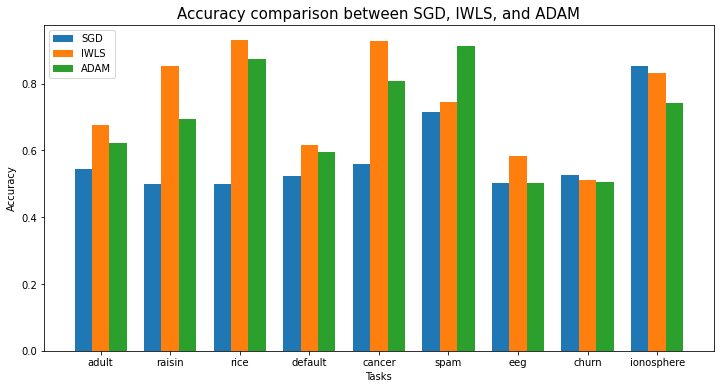

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (16, 12))

labels = list(results['SGD'].keys())
SGD_values = list(results['SGD'].values())
IWLS_values = list(results['IWLS'].values())
ADAM_values = list(results['ADAM'].values())

x = range(len(labels))

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.25

plt.bar(x, SGD_values, width=bar_width, label='SGD')
plt.bar([i + bar_width for i in x], IWLS_values, width=bar_width, label='IWLS')
plt.bar([i + bar_width*2 for i in x], ADAM_values, width=bar_width, label='ADAM')

plt.xlabel('Tasks')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison between SGD, IWLS, and ADAM', fontsize = 15)
plt.xticks([i + bar_width for i in x], labels)
plt.legend()
plt.savefig('./media/task3_2.jpg', dpi = 200)
plt.show()